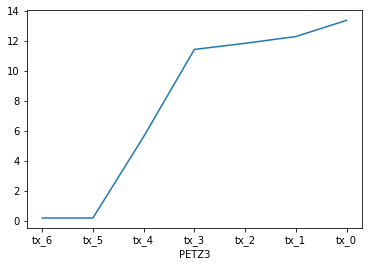

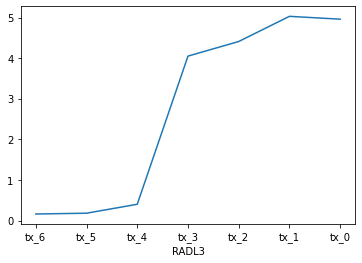

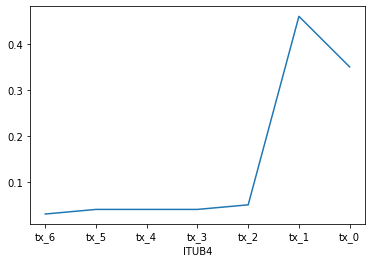

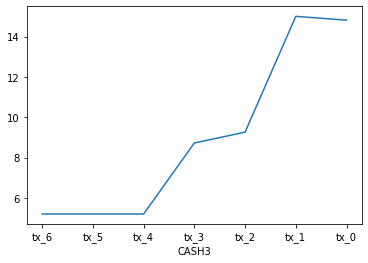

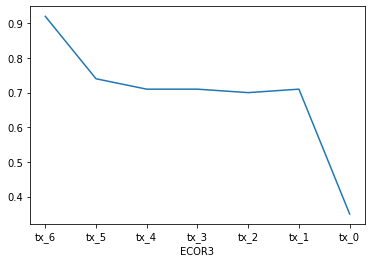

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import psycopg2
import datetime 
import subprocess
import DB
import carteira_ibov
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import Markdown as md






ibov= pd.DataFrame(carteira_ibov.consulta_ibov())



df=pd.DataFrame()
df['codigo']=ibov['cod']
for i in range(6,-1,-1):
    df['tx_'+str(i)]= df['codigo'].apply(lambda x: DB.get_taxa(ticker_name=x,pos=i))

    

df.set_index('codigo', inplace=True)

df['taxa_min'] = df[['tx_6',  'tx_5',  'tx_4',  'tx_3',  'tx_2',  "tx_1" , 'tx_0']].min(axis=1)

df=df[df['taxa_min']!=0]

df['taxa_max']= df[['tx_6',  'tx_5',  'tx_4',  'tx_3',  'tx_2',  "tx_1" , 'tx_0']].max(axis=1)

df['dif']= ((df['taxa_max']-df['taxa_min'])/df['taxa_max'])*100

df=df.sort_values(by='dif', ascending=False)



for i in range(5):
    plt.figure()
    df[['tx_6',  'tx_5',  'tx_4',  'tx_3',  'tx_2',  "tx_1" , 'tx_0']].iloc[i].plot(xlabel=df.index[i])



##





